In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1], [4.5, 2.3],
    [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0], [8.0, 0.5], [7.5, 0.8],
    [8.1, -0.1], [2.5, 3.5], [1.0, 3.0], [4.5, -1.0], [3.0, -0.5], [5.1, -0.2],
    [6.0, -1.5], [3.5, -0.1], [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3],
    [5.8, 0.6]
])

centroid1 = np.array([3.0, 3.0])
centroid2 = np.array([2.0, 2.0])

In [12]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [13]:
def kmeans(X, init_centroids, k=2, max_iter=100, threshold=1e-4):
    centroids = np.array(init_centroids)
    for iter in range(max_iter):
        # assignment
        clusters = [[] for i in range(k)]
        for point in X:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        # update
        new_centroids = []
        for cluster in clusters:
            if cluster:  
                new_centroids.append(np.mean(cluster, axis=0))
            else:
                new_centroids.append(np.random.uniform(np.min(X, axis=0), np.max(X, axis=0)))
        new_centroids = np.array(new_centroids)

        # converge
        if np.all(np.abs(new_centroids - centroids) < threshold):
            break

        centroids = new_centroids

    return centroids, clusters

In [14]:
init_centroids = [centroid1, centroid2]
final_centroids, final_clusters = kmeans(X, init_centroids)

print("Initialization Centroids:", init_centroids)
print("Final Centroids:", final_centroids)
print("Final Clusters:", final_clusters)

Initialization Centroids: [array([3., 3.]), array([2., 2.])]
Final Centroids: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Final Clusters: [[array([5.1, 3.5]), array([4.9, 3. ]), array([5.8, 2.7]), array([6., 3.]), array([6.7, 3.1]), array([4.5, 2.3]), array([6.1, 2.8]), array([5.2, 3.2]), array([5.5, 2.6]), array([5., 2.]), array([8. , 0.5]), array([7.5, 0.8]), array([ 8.1, -0.1]), array([2.5, 3.5]), array([6.1, 0.5]), array([5.8, 0.6])], [array([1., 3.]), array([ 4.5, -1. ]), array([ 3. , -0.5]), array([ 5.1, -0.2]), array([ 6. , -1.5]), array([ 3.5, -0.1]), array([4., 0.]), array([ 5.4, -0.5]), array([5.3, 0.3])]]


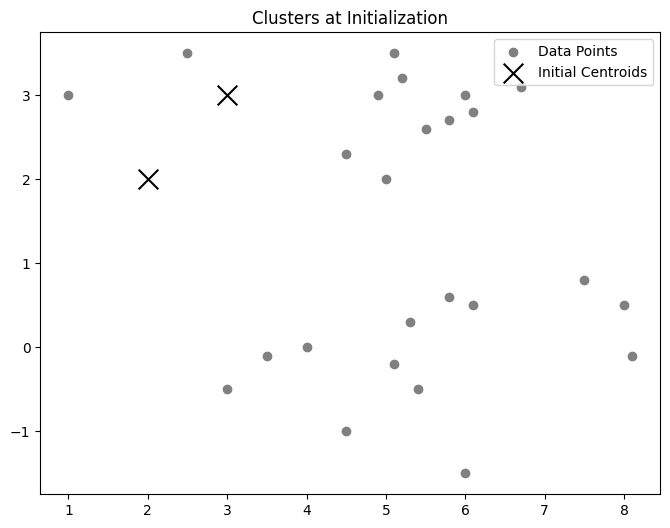

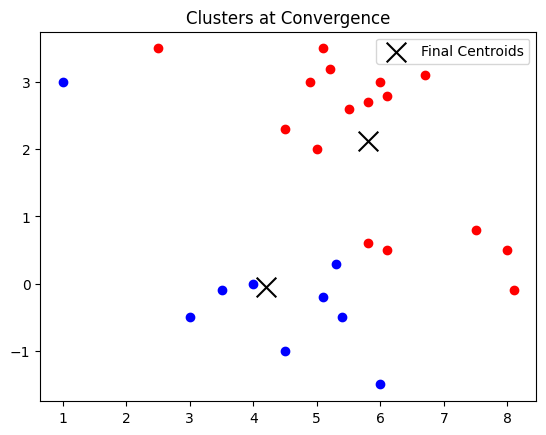

In [15]:
# Plot 
colors = ['r', 'b']
plt.figure(figsize=(8, 6))

# initial
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter([u[0] for u in init_centroids], [u[1] for u in init_centroids], c='k', marker='x', s=200, label='Initial Centroids')
plt.title('Clusters at Initialization')
plt.legend()
plt.show()

# final
for cluster, color in zip(final_clusters, colors):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], c=color)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='k', marker='x', s=200, label='Final Centroids')
plt.title('Clusters at Convergence')
plt.legend()
plt.show()

In [16]:
# Random init
np.random.seed(42)
random_centroids = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=(2, 2))
random_final_centroids, random_final_clusters = kmeans(X, random_centroids)

print("Random Initialization Centroids:", random_centroids)
print("Random Final Centroids:", random_final_centroids)
print("Random Final Clusters:", random_final_clusters)



Random Initialization Centroids: [[3.65923484 3.25357153]
 [6.19715699 1.49329242]]
Random Final Centroids: [[ 4.85833333  2.89166667]
 [ 5.56153846 -0.09230769]]
Random Final Clusters: [[array([5.1, 3.5]), array([4.9, 3. ]), array([5.8, 2.7]), array([6., 3.]), array([6.7, 3.1]), array([4.5, 2.3]), array([6.1, 2.8]), array([5.2, 3.2]), array([5.5, 2.6]), array([5., 2.]), array([2.5, 3.5]), array([1., 3.])], [array([8. , 0.5]), array([7.5, 0.8]), array([ 8.1, -0.1]), array([ 4.5, -1. ]), array([ 3. , -0.5]), array([ 5.1, -0.2]), array([ 6. , -1.5]), array([ 3.5, -0.1]), array([4., 0.]), array([6.1, 0.5]), array([ 5.4, -0.5]), array([5.3, 0.3]), array([5.8, 0.6])]]


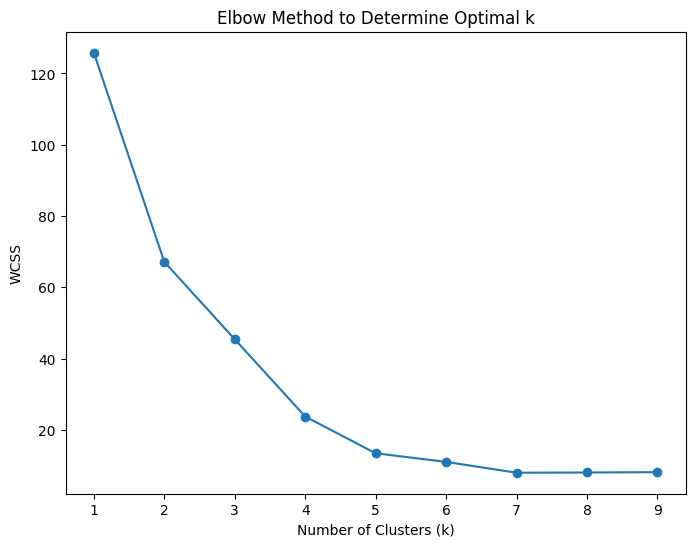

In [17]:
# Elbow Plot
def calculate_wcss(X, clusters, centroids):
    wcss = 0
    for cluster, centroid in zip(clusters, centroids):
        cluster = np.array(cluster)
        wcss += np.sum((cluster - centroid) ** 2)
    return wcss

wcss_values = []
K_values = range(1, 10)
for k in K_values:
    initial_centroids = [X[np.random.choice(len(X))] for _ in range(k)]
    centroids, clusters = kmeans(X, initial_centroids, k=k)
    wcss = calculate_wcss(X, clusters, centroids)
    wcss_values.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(K_values, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


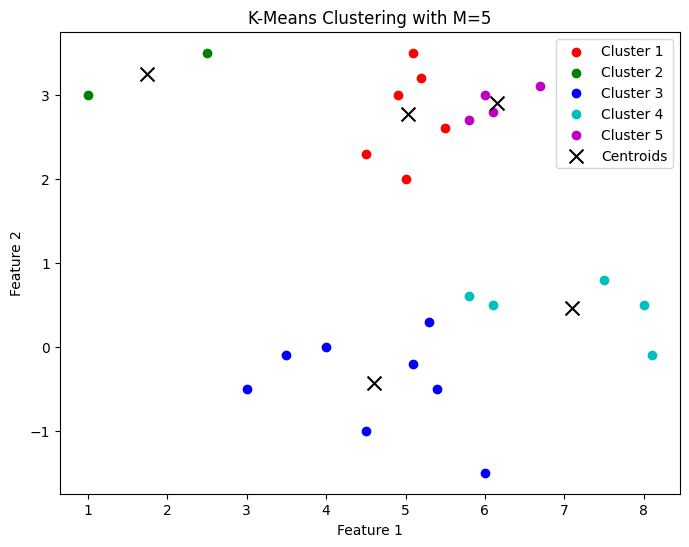

In [18]:
M = 5
initial_centroids = [X[np.random.choice(len(X))] for _ in range(M)]  
centroids, clusters = kmeans(X, initial_centroids, k=M)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  
plt.figure(figsize=(8, 6))

for cluster_idx, cluster in enumerate(clusters):
    cluster = np.array(cluster) 
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[cluster_idx % len(colors)], label=f"Cluster {cluster_idx+1}")

centroids = np.array(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-Means Clustering with M={M}')
plt.legend()
plt.show()